### Code implementation - A pulse of the Earth: A 27.5-Myr underlying cycle in coordinated geological events over the last 260 Myr by Michael R. Rampino, Ken Caldeira and Yuhong Zhu


In [259]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

### Columns in the dataset are main events in the geological record (compiled by Rampino et al, 2021) as provided in the paper

## Data cleaning

The idea is to leave a list of dates to see any recurrent pattern

In [260]:
df = pd.read_excel("geological_events.xlsx")
df.columns

Index(['IntervalMa', 'MarineExtinction', 'AnoxicEvent', 'ContinentalBasalt',
       'SequenceBoundary', 'NonMarineExtinction', 'ChangesSpreadingRate',
       'IntraPlateVolcanism'],
      dtype='object')

In [261]:
df # original dataframe as is in the paper

,IntervalMa,MarineExtinction,AnoxicEvent,ContinentalBasalt,SequenceBoundary,NonMarineExtinction,ChangesSpreadingRate,IntraPlateVolcanism
0,0–9,2.6,—,—,5.33,7.25,—,3
1,10–19,11.6,—,16.6 ± 0.03,11.63,—,—,"10, 15"
2,20–29,—,—,—,23.03,—,—,23
3,30–39,36.5,—,30.4 ± 0.4,33.9,33.9,—,30
4,40–49,—,—,41.2,—,—,40,NaN
5,50–59,—,56.0,56.6 ± 0.3,52.0,—,"50, 58",—
6,60–69,66.04,66,61.9; 66.3,61.6; 68,66,—,"60, 65"
7,70–79,—,—,—,—,—,75,—
8,80–89,—,—,—,84.2,—,80,—
9,90–99,93.9,93.9,92.9 ± 3.8,93.9,—,—,—


In [262]:
# replace non numeric values with Nan
df.replace("—", np.nan, inplace=True)
df.replace("____", np.nan, inplace=True)
df



,IntervalMa,MarineExtinction,AnoxicEvent,ContinentalBasalt,SequenceBoundary,NonMarineExtinction,ChangesSpreadingRate,IntraPlateVolcanism
0,0–9,2.6,NaN,NaN,5.33,7.25,NaN,3
1,10–19,11.6,NaN,16.6 ± 0.03,11.63,NaN,NaN,"10, 15"
2,20–29,NaN,NaN,NaN,23.03,NaN,NaN,23
3,30–39,36.5,NaN,30.4 ± 0.4,33.9,33.9,NaN,30
4,40–49,NaN,NaN,41.2,NaN,NaN,40,NaN
5,50–59,NaN,56.0,56.6 ± 0.3,52.0,NaN,"50, 58",NaN
6,60–69,66.04,66,61.9; 66.3,61.6; 68,66,NaN,"60, 65"
7,70–79,NaN,NaN,NaN,NaN,NaN,75,NaN
8,80–89,NaN,NaN,NaN,84.2,NaN,80,NaN
9,90–99,93.9,93.9,92.9 ± 3.8,93.9,NaN,NaN,NaN


In [263]:
marine_extinction = df["MarineExtinction"]
anoxic_event = df["AnoxicEvent"]
continental_basalt = df["ContinentalBasalt"]
sequence_boundary = df["SequenceBoundary"]
nonmarine_extinction = df["NonMarineExtinction"]
changes_spreading_rate = df["ChangesSpreadingRate"]
intraplate_volcanism = df["IntraPlateVolcanism"]

data_columns = [marine_extinction, anoxic_event, continental_basalt, sequence_boundary, nonmarine_extinction, changes_spreading_rate, intraplate_volcanism]

In [264]:
def cleanColumns(column: pd.Series) -> list:
    
    ls = list(column)
    ls_temp = [] 
    for i in ls:
        ls_temp += str(i).split(";")

    ls_temp = [i.split("±") for i in ls_temp]
    


    def extract(lst):
        return [item[0] for item in lst if type(item)==list]

    def convertFloat(lst):
        return [float(item) for item in lst]

    result = extract(ls_temp)
    return list(result)

In [265]:
temp_dates = []
for i in data_columns:
    i = cleanColumns(i)
    temp_dates.append(i)


In [266]:
raw_dates = []
for i in temp_dates:
    i = [x.split(",") for x in i]
    raw_dates.append(i)

In [269]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def convertFloat(lst):
    return [float(item) for item in lst]
marine_exts = convertFloat(extract(mext))

# flatten_twice
list_dates = flatten_list(flatten_list(raw_dates))
# convert all elements to float
float_dates = convertFloat(list_dates)
# clean of Nans
cleaned_dates = [x for x in float_dates if str(x) != 'nan']

In [274]:
len(cleaned_dates) # total of events is correct!

89

(array([2., 2., 1., 2., 1., 1., 0., 2., 0., 0., 2., 0., 2., 1., 2., 0., 0.,
        0., 1., 1., 2., 1., 2., 1., 5., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 4., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 3., 0., 1., 2.,
        1., 0., 2., 2., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 2., 0., 0.,
        0., 1., 3., 0., 0., 1., 0., 0., 1., 4., 1., 0., 0., 0., 2., 1., 0.,
        0., 0., 2., 0., 0., 0., 1., 0., 0., 1., 0., 5., 0., 0., 5.]),
 array([  2.6  ,   5.174,   7.748,  10.322,  12.896,  15.47 ,  18.044,
         20.618,  23.192,  25.766,  28.34 ,  30.914,  33.488,  36.062,
         38.636,  41.21 ,  43.784,  46.358,  48.932,  51.506,  54.08 ,
         56.654,  59.228,  61.802,  64.376,  66.95 ,  69.524,  72.098,
         74.672,  77.246,  79.82 ,  82.394,  84.968,  87.542,  90.116,
         92.69 ,  95.264,  97.838, 100.412, 102.986, 105.56 , 108.134,
        110.708, 113.282, 115.856, 118.43 , 121.004, 123.578, 126.152,
        128.726, 131.3  , 133.874, 136.448, 139.022, 

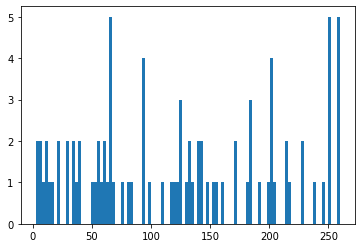

In [278]:
plt.hist(cleaned_dates, bins=100)

In [279]:
!git add .

The file will have its original line endings in your working directory


In [ ]:
!git commit -m "added preprocessing"